## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Demo
demo = pd.read_sas("DEMO_I.XPT")
demo = demo[["SEQN","RIAGENDR","RIDAGEYR","RIDRETH3","DMDEDUC2","DMDMARTL","RIDEXPRG","INDHHIN2","INDFMIN2","INDFMPIR"]]

# Examination
bpx = pd.read_sas("BPX_I.XPT")
bpx = bpx[["SEQN","BPXPLS","BPXSY1","BPXDI1","BPXSY2","BPXDI2","BPXSY3","BPXDI3","BPXSY4","BPXDI4"]]
bmx = pd.read_sas("BMX_I.XPT")
bmx = bmx[["SEQN","BMXWT","BMXHT","BMXBMI","BMXLEG","BMXARML","BMXARMC","BMXWAIST","BMDAVSAD"]]

# Laboratory
ghb = pd.read_sas("GHB_I.XPT")#糖化血红蛋白
hdl = pd.read_sas("HDL_I.XPT") #血脂
hdl = hdl[["SEQN","LBDHDD"]] 
tchol = pd.read_sas("TCHOL_I.XPT") #脂蛋白
tchol = tchol[["SEQN","LBXTC"]]
cbc = pd.read_sas("CBC_I.XPT") #血常规
cbc = cbc[["SEQN","LBXWBCSI", "LBXLYPCT", "LBXMOPCT", "LBXNEPCT","LBXEOPCT", "LBXBAPCT", "LBXRBCSI", "LBXHGB",
           "LBXHCT", "LBXMCVSI", "LBXMCHSI", "LBXRDW", "LBXPLTSI", "LBXMPSI"]]
fast = pd.read_sas("FASTQX_I.XPT") #空腹问卷
fast = fast[["SEQN","PHQ020","PHQ030","PHQ040","PHQ050","PHQ060","PHAFSTHR"]]
folate = pd.read_sas("FOLATE_I.XPT") #叶酸
folate = folate[["SEQN","LBDRFO"]]
pro = pd.read_sas("BIOPRO_I.XPT") #标准生物文档
pro = pro[["SEQN","LBXSAL","LBXSAPSI","LBXSASSI", "LBXSATSI", "LBXSBU", "LBXSC3SI", "LBXSCA",
           "LBXSCH","LBXSCK","LBXSCLSI","LBXSCR","LBXSGB", "LBXSGL", "LBXSGTSI", "LBXSIR", 
           "LBXSKSI","LBXSLDSI", "LBXSNASI", "LBXSOSSI", "LBXSPH", "LBXSTB", "LBXSTP","LBXSTR","LBXSUA"]]

# Questionaire
alq = pd.read_sas("ALQ_I.XPT") #酒
alq = alq[["SEQN","ALQ101"]] #"ALQ120Q","ALQ151"
bpq = pd.read_sas("BPQ_I.XPT") #高血压胆固醇病史
bpq = bpq[["SEQN","BPQ020","BPQ080"]]#"BPQ090D"
hsq = pd.read_sas("HSQ_I.XPT") #自我测评
hsq = hsq[["SEQN","HSD010","HSQ500","HSQ510"]]
diq = pd.read_sas("DIQ_I.XPT") #糖尿病
diq = diq[["SEQN","DIQ010","DIQ050"]]
mcq = pd.read_sas("MCQ_I.XPT") #医疗条件，病史
mcq = mcq[["SEQN","MCQ010","MCQ080","MCQ092","MCQ160B","MCQ160C","MCQ160D","MCQ160E","MCQ160F","MCQ160M",
           "MCQ300A","MCQ300B","MCQ300C","MCQ365A","MCQ365B","MCQ365C","MCQ365D"]]
dpq = pd.read_sas("DPQ_I.XPT") #精神健康
dpq = dpq.drop(columns=["DPQ100"]) 
paq = pd.read_sas("PAQ_I.XPT") #体育运动
paq = paq[["SEQN","PAQ605","PAQ620","PAQ635","PAQ650","PAQ665","PAD680"]]
smq = pd.read_sas("SMQ_I.XPT") #吸烟
smq = smq[["SEQN","SMQ020"]]

df = pd.merge(demo,bpx)
data_frames = [df,bmx,ghb,hdl,tchol,cbc,fast,folate,pro,alq,bpq,hsq,diq,mcq,dpq,paq,smq] #ins,cdq,
df = reduce(lambda left,right: pd.merge(left,right,how="inner"), data_frames)

df = df.loc[df.RIDAGEYR>=20,]
df = df.loc[df.RIDEXPRG!=70,]
df["avg_systolic_bp"] = df[["BPXSY1","BPXSY2","BPXSY3","BPXSY4"]].mean(axis=1)
df["avg_diastolic_bp"] = df[["BPXDI1","BPXDI2","BPXDI3","BPXDI4"]].mean(axis=1)
df = df[pd.notnull(df["avg_systolic_bp"])]
df = df[pd.notnull(df["avg_diastolic_bp"])]
#df["label"] = 1*((df["avg_systolic_bp"]>=130) | (df["avg_diastolic_bp"]>=85))
df["label"] = 1*((df["avg_systolic_bp"]>=140) | (df["avg_diastolic_bp"]>=90)|
                ((df["BPXSY1"]>=160)&(df["BPXDI1"]>=100))|((df["BPXSY2"]>=160)&(df["BPXDI2"]>=100))|
                ((df["BPXSY3"]>=160)&(df["BPXDI3"]>=100))|((df["BPXSY4"]>=160)&(df["BPXDI4"]>=100)))
df = df.drop(columns=["SEQN","RIDEXPRG","BPXSY1","BPXDI1","BPXSY2","BPXDI2","BPXSY3",
                      "BPXDI3","BPXSY4","BPXDI4","avg_systolic_bp","avg_diastolic_bp"])

In [3]:
cat=['RIAGENDR','RIDRETH3','PHQ020', 'PHQ030','PHQ040', 'PHQ050', 'PHQ060']
cat79=['DMDEDUC2', 'DMDMARTL','ALQ101','BPQ020','BPQ080','HSD010', 'HSQ500', 'HSQ510',
       'DIQ010', 'DIQ050','MCQ010', 'MCQ080', 'MCQ092', 'MCQ160B', 'MCQ160C', 'MCQ160D','MCQ160E', 'MCQ160F', 
       'MCQ160M','MCQ300A', 'MCQ300B', 'MCQ300C','MCQ365A', 'MCQ365B', 'MCQ365C', 'MCQ365D','DPQ010', 'DPQ020',
       'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090', 'PAQ605', 'PAQ620', 'PAQ635', 
       'PAQ650', 'PAQ665','SMQ020']
df.INDHHIN2 = df.INDHHIN2.replace([77,99], np.nan)
df.INDFMIN2 = df.INDFMIN2.replace([77,99], np.nan)
df.PAD680 = df.PAD680.replace([7777,9999], np.nan)
for name in cat79: 
    df[name]=df[name].map(lambda x: x if x<7 else np.nan)
for name in cat+cat79:
    df[name]=df[name].astype("object")
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 5734
Columns: 106 entries, RIAGENDR to label
dtypes: float64(57), int32(1), object(48)
memory usage: 2.8+ MB


In [4]:
df["label"].value_counts()

0    2860
1     638
Name: label, dtype: int64

In [6]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Response</b>','<b>Count</b>','<b>Percent</b>'],
    #line_color='lightgrey',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['1-Hypertension','0-Normal Range'],
      np.round([638,2860],3),
      np.round([638/(638+2860),(2860/(2860+638))],3)],
    #line_color='lightgrey',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor,rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1] ,random_state=0)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train_cat = X_train.select_dtypes(include='object')
X_train_num = X_train.select_dtypes(exclude='object')
X_test_cat = X_test.select_dtypes(include='object')
X_test_num = X_test.select_dtypes(exclude='object')
cat_colnames = X_train_cat.columns.tolist()
num_colnames = X_train_num.columns.tolist()

# imp_num = SimpleImputer(missing_values=np.nan, strategy="mean")
# X_train_num = imp_num.fit_transform(X_train_num)
# X_test_num = imp_num.transform(X_test_num)

scaler = MinMaxScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns=num_colnames)
X_test_num = pd.DataFrame(scaler.transform(X_test_num), columns=num_colnames)

enc = OneHotEncoder()
X_train_cat_enc = enc.fit_transform(X_train_cat)
cat_colnames = enc.get_feature_names(cat_colnames)
X_train_cat = pd.DataFrame(X_train_cat_enc.toarray(),columns=cat_colnames)
X_test_cat = pd.DataFrame(enc.transform(X_test_cat).toarray(),columns=cat_colnames)

X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [8]:
X_train.shape

(2623, 186)

## Feature Importance

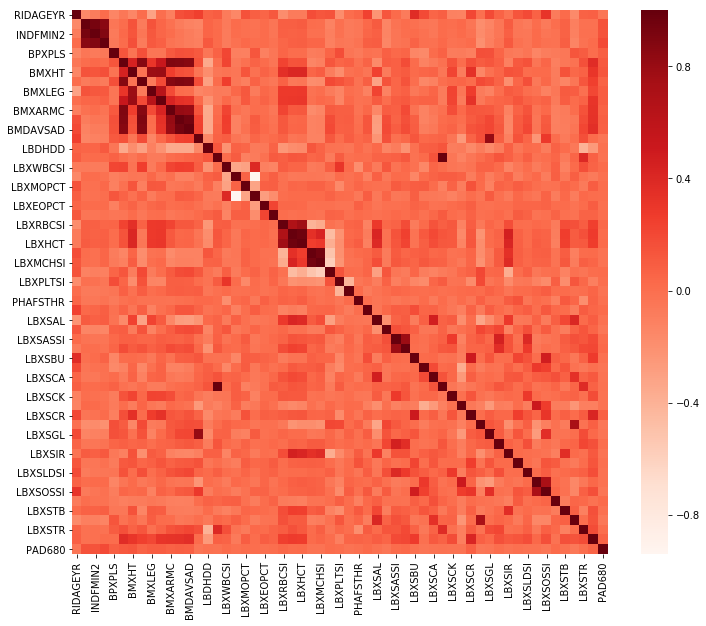

In [119]:
### heat map annot=True,
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = X_train_num.corr()
sns.heatmap(cor,cmap=plt.cm.Reds)
plt.show()

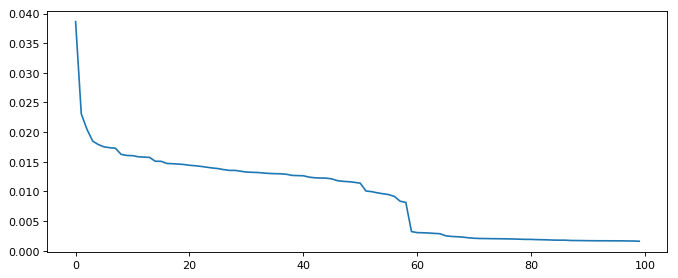

In [42]:
### random forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=1000).fit(X_train, y_train)
plt.figure(figsize=(10,4), dpi=80)
plt.plot(sorted(clf.feature_importances_ ,reverse=True)[0:100])
plt.show()

In [43]:
sorted(list(zip(X_train.columns,clf.feature_importances_)), key=lambda x: x[1],reverse=True)[0:20]

[('RIDAGEYR', 0.038634252335550234),
 ('BPQ020_2.0', 0.023082004843082655),
 ('BPQ020_1.0', 0.020463494557622783),
 ('LBXSLDSI', 0.01848243118956949),
 ('LBXTC', 0.017890961654465975),
 ('LBXSCH', 0.017503233006207958),
 ('LBXGH', 0.017360390116125685),
 ('LBXSGL', 0.017272340070251944),
 ('BMXARMC', 0.01623556711408332),
 ('LBDRFO', 0.016050909410795625),
 ('BMDAVSAD', 0.016025539904194697),
 ('LBXSCR', 0.01583415369723583),
 ('BMXWT', 0.015777917678575778),
 ('LBXSAPSI', 0.015722923797648176),
 ('LBXSKSI', 0.015076831362607807),
 ('BMXWAIST', 0.015071614622416005),
 ('LBXSTR', 0.01471628708622553),
 ('BMXLEG', 0.014663574070116732),
 ('LBXEOPCT', 0.014601892008371937),
 ('LBXLYPCT', 0.014530893840191446)]

In [157]:
selected_colnames=[x[0] for x in sorted(list(zip(X_train.columns,clf.feature_importances_)), key=lambda x: x[1],reverse=True)[0:20]]
X_train_selected = X_train[selected_colnames]
X_test_selected = X_test[selected_colnames]

In [80]:
X_train_selected.shape

(2623, 20)

## Methods

In [67]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

In [68]:
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train_selected, y_train)
print(fbeta_score(y_train,dummy_clf.predict(X_train_selected),beta=2,average='macro'),
      fbeta_score(y_test,dummy_clf.predict(X_test_selected),beta=2,average='macro'))

0.4781420765027322 0.4801324503311258


### Random Forest

In [69]:
for i in [9,10]:
    for j in [7,8,9,10]:
        lr = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=i,max_features=j)
        cvs = cross_val_score(lr,X_train_selected,y_train,scoring=make_scorer(fbeta_score,beta=2,average='macro'),cv=5) 
        print([i,j,cvs,np.mean(cvs)])

[9, 7, array([0.51424985, 0.53495141, 0.51526986, 0.50818436, 0.53688199]), 0.5219074938326882]
[9, 8, array([0.50567842, 0.55003271, 0.50172103, 0.51461648, 0.49426824]), 0.5132633774754065]
[9, 9, array([0.49541208, 0.53175959, 0.51424985, 0.5253147 , 0.52635135]), 0.5186175139879678]
[9, 10, array([0.51424985, 0.51322952, 0.52666134, 0.51461648, 0.51999652]), 0.5177507448777974]
[10, 7, array([0.49541208, 0.52666134, 0.52253951, 0.51260524, 0.51897523]), 0.5152386795455186]
[10, 8, array([0.51424985, 0.54178492, 0.51730898, 0.5115991 , 0.53267575]), 0.523523717386779]
[10, 9, array([0.51424985, 0.53572207, 0.52253951, 0.53162389, 0.51999652]), 0.5248263690262528]
[10, 10, array([0.51322952, 0.53069544, 0.51943512, 0.5105926 , 0.53162389]), 0.5211153141996546]


In [158]:
clf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=10,max_features=8).fit(X_train_selected, y_train)
print(fbeta_score(y_train,clf.predict(X_train_selected),beta=2,average='macro'),
  fbeta_score(y_test,clf.predict(X_test_selected),beta=2,average='macro'))

0.8129218633459552 0.5347600798260689


### Boosting

In [41]:
for i in [4,5,6]:
    for j in [3,4,5,6,7,10]:
        lr = GradientBoostingClassifier(n_estimators=100,max_depth=i,random_state=0,max_features=j)
        cvs = cross_val_score(lr,X_train_selected,y_train,scoring=make_scorer(fbeta_score,beta=2,average='macro'),cv=5) 
        print([i,j,cvs,np.mean(cvs)])

[4, 3, array([0.50914503, 0.53786452, 0.52456194, 0.5138645 , 0.53256746]), 0.5236006922381]
[4, 4, array([0.5193101 , 0.51898044, 0.51529244, 0.52320384, 0.51701373]), 0.5187601098117245]
[4, 5, array([0.51529244, 0.54055463, 0.52924988, 0.53150009, 0.52636254]), 0.5285919170217068]
[4, 6, array([0.52141144, 0.52867334, 0.54287739, 0.51898971, 0.52004353]), 0.526399082809675]
[4, 7, array([0.5163285 , 0.52976626, 0.54560734, 0.51371746, 0.52616163]), 0.5263162365907774]
[4, 10, array([0.52141144, 0.53479767, 0.54228884, 0.52081989, 0.51181779]), 0.5262271268846689]
[5, 3, array([0.51425612, 0.53927395, 0.5515873 , 0.52735052, 0.50973754]), 0.5284410870141182]
[5, 4, array([0.50607817, 0.52320742, 0.54118274, 0.51477235, 0.53008705]), 0.5230655469828402]
[5, 5, array([0.50914503, 0.52901533, 0.53140762, 0.51371746, 0.52900473]), 0.522458033376609]
[5, 6, array([0.52351197, 0.52648726, 0.53304459, 0.53008705, 0.52402537]), 0.527431247693982]
[5, 7, array([0.5224618 , 0.53565238, 0.53085

In [159]:
gbdt = GradientBoostingClassifier(n_estimators=100,max_depth=6,random_state=0,max_features=10).fit(X_train_selected, y_train)
print(fbeta_score(y_train,gbdt.predict(X_train_selected),beta=2,average='macro'),
      fbeta_score(y_test,gbdt.predict(X_test_selected),beta=2,average='macro'))

0.9220098490754607 0.5544283288336396


### SVM

In [160]:
for i in [1,10,100]:
    for k in ['linear','poly','rbf','sigmoid']:
        lr = SVC(probability=True,kernel=k,C=i)
        cvs = cross_val_score(lr,X_train_selected,y_train,scoring=make_scorer(fbeta_score,beta=2,average='macro'),cv=5) 
        print([i,k,cvs,np.mean(cvs)])

[1, 'linear', array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]
[1, 'poly', array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]
[1, 'rbf', array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]
[1, 'sigmoid', array([0.51783171, 0.49767559, 0.49823238, 0.53140594, 0.50787716]), 0.5106045558555898]
[10, 'linear', array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]
[10, 'poly', array([0.48459113, 0.49482087, 0.47805643, 0.48491172, 0.47827061]), 0.4841301513155606]
[10, 'rbf', array([0.47816011, 0.51322952, 0.50125313, 0.5115991 , 0.51662637]), 0.5041736475118019]
[10, 'sigmoid', array([0.50357771, 0.50357771, 0.4988328 , 0.52077682, 0.50778469]), 0.506909944241763]
[100, 'linear', array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]


KeyboardInterrupt: 

In [170]:
lsvc = SVC(C=100,kernel='sigmoid',probability=True,random_state=0).fit(X_train_selected, y_train)
print(fbeta_score(y_train,lsvc.predict(X_train_selected),beta=2,average='macro'),
      fbeta_score(y_test,lsvc.predict(X_test_selected),beta=2,average='macro'))

0.5070299002025545 0.48821368710103064


### Logistic

In [171]:
for i in [0.01,0.1,1,10,100,1e3,1e4,1e5,1e6,1e7]:
    lr = LogisticRegression(C=i)
    cvs = cross_val_score(lr,X_train_selected,y_train,scoring=make_scorer(fbeta_score,beta=2,average='macro'),cv=5) 
    print([i,cvs,np.mean(cvs)])

[0.01, array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]
[0.1, array([0.48463193, 0.47805643, 0.47805643, 0.47736441, 0.47827061]), 0.4792759610072004]
[1, array([0.48715249, 0.48741688, 0.48278651, 0.48775774, 0.51016255]), 0.49105523388894545]
[10, array([0.48619127, 0.51730898, 0.49577679, 0.48681553, 0.50620451]), 0.4984594155480817]
[100, array([0.4905302 , 0.52047015, 0.49930816, 0.49426824, 0.5169318 ]), 0.5043017097510761]
[1000.0, array([0.4905302 , 0.5224618 , 0.51201832, 0.4933099 , 0.52324078]), 0.5083122006934587]
[10000.0, array([0.4905302 , 0.5224618 , 0.51201832, 0.4933099 , 0.52324078]), 0.5083122006934587]
[100000.0, array([0.4905302 , 0.5224618 , 0.51201832, 0.4933099 , 0.52324078]), 0.5083122006934587]
[1000000.0, array([0.4905302 , 0.5224618 , 0.51201832, 0.4933099 , 0.52324078]), 0.5083122006934587]
[10000000.0, array([0.4905302 , 0.5224618 , 0.51201832, 0.4933099 , 0.52324078]), 0.5083122006934587]


In [190]:
lg = LogisticRegression(C=1e3).fit(X_train_selected, y_train)
print(fbeta_score(y_train,lg.predict(X_train_selected),beta=2,average='macro'),
      fbeta_score(y_test,lg.predict(X_test_selected),beta=2,average='macro'))

0.5165740369192977 0.49756238993170393


### Ridge

In [180]:
for i in [0.001,0.01,0.1,1,10,100]:
    lr = RidgeClassifier(alpha=i)
    cvs = cross_val_score(lr,X_train_selected,y_train,scoring=make_scorer(fbeta_score,beta=2,average='macro'),cv=5) 
    print([i,cvs,np.mean(cvs)])

[0.001, array([0.49117534, 0.48463193, 0.47805643, 0.47827061, 0.47736441]), 0.48189974366912613]
[0.01, array([0.49117534, 0.48463193, 0.47805643, 0.47827061, 0.47736441]), 0.48189974366912613]
[0.1, array([0.48463193, 0.48463193, 0.47805643, 0.47827061, 0.47827061]), 0.48077230198374127]
[1, array([0.48463193, 0.47805643, 0.47805643, 0.47736441, 0.47827061]), 0.4792759610072004]
[10, array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]
[100, array([0.47805643, 0.47805643, 0.47805643, 0.47827061, 0.47827061]), 0.4781420995269715]


In [184]:
ridge = RidgeClassifier(alpha=0.1).fit(X_train_selected, y_train)
print(fbeta_score(y_train,ridge.predict(X_train_selected),beta=2,average='macro'),
      fbeta_score(y_test,ridge.predict(X_test_selected),beta=2,average='macro'))

0.48078661100298353 0.4801324503311258


### KNN

In [185]:
for i in [2,3,4,5,6]:
    lr = KNeighborsClassifier(n_neighbors=i)
    cvs = cross_val_score(lr,X_train_selected,y_train,scoring=make_scorer(fbeta_score,beta=2,average='macro'),cv=5) 
    print([i,cvs,np.mean(cvs)])

[2, array([0.52141144, 0.49179547, 0.54039307, 0.51077781, 0.49342377]), 0.5115603112614872]
[3, array([0.52570011, 0.49789272, 0.59246661, 0.54203995, 0.54827231]), 0.5412743386392483]
[4, array([0.49279017, 0.50198413, 0.54339497, 0.51493613, 0.51597506]), 0.5138160909318628]
[5, array([0.52867334, 0.51088781, 0.5701581 , 0.5323835 , 0.52575723]), 0.5335719954423528]
[6, array([0.49775643, 0.51321952, 0.53572207, 0.49195998, 0.51795365]), 0.5113223311107933]


In [188]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_selected, y_train)
print(fbeta_score(y_train,knn.predict(X_train_selected),beta=2,average='macro'),
      fbeta_score(y_test,knn.predict(X_test_selected),beta=2,average='macro'))

0.7088292350721553 0.5270258050727038


## Evaluation

### Precision-Recall

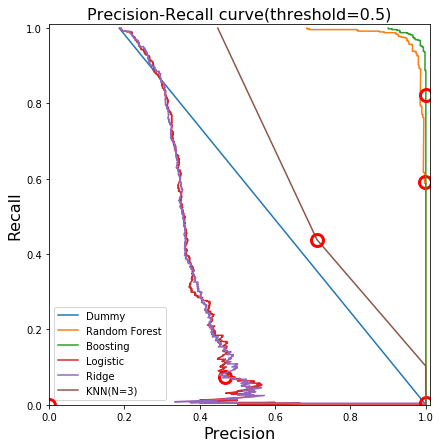

In [195]:
plt.figure(figsize=(7,7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

dummy_clf_df = dummy_clf.predict_proba(X_train_selected)[:,1]
precision_dummy_clf, recall_dummy_clf, thresholds = precision_recall_curve(y_train, dummy_clf_df)
plt.plot(precision_dummy_clf, recall_dummy_clf, label='Dummy')
plt.plot(precision_score(y_train,dummy_clf.predict(X_train_selected)), recall_score(y_train,dummy_clf.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

clf_df = clf.predict_proba(X_train_selected)[:,1]
precision_clf, recall_clf, thresholds = precision_recall_curve(y_train, clf_df)
plt.plot(precision_clf, recall_clf, label='Random Forest')
plt.plot(precision_score(y_train,clf.predict(X_train_selected)), recall_score(y_train,clf.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

gbdt_df = gbdt.predict_proba(X_train_selected)[:,1]
precision_gbdt, recall_gbdt, thresholds = precision_recall_curve(y_train, gbdt_df)
plt.plot(precision_gbdt, recall_gbdt, label='Boosting')
plt.plot(precision_score(y_train,gbdt.predict(X_train_selected)), recall_score(y_train,gbdt.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

# lsvc_df = lsvc.predict_proba(X_train_selected)[:,1]
# precision_lsvc, recall_lsvc, thresholds = precision_recall_curve(y_train, lsvc_df)
# plt.plot(precision_lsvc, recall_lsvc, label='SVM')
# plt.plot(precision_score(y_train,lsvc.predict(X_train_selected)), recall_score(y_train,lsvc.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

lg_df = lg.predict_proba(X_train_selected)[:,1]
precision_lg, recall_lg, thresholds = precision_recall_curve(y_train, lg_df)
plt.plot(precision_lg, recall_lg, label='Logistic')
plt.plot(precision_score(y_train,lg.predict(X_train_selected)), recall_score(y_train,lg.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

ridge_df = np.exp(ridge.decision_function(X_train_selected)) / np.sum(np.exp(ridge.decision_function(X_train_selected)))
precision_ridge, recall_ridge, thresholds = precision_recall_curve(y_train, ridge_df)
plt.plot(precision_ridge, recall_ridge, label='Ridge')
plt.plot(precision_score(y_train,ridge.predict(X_train_selected)), recall_score(y_train,ridge.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

knn_df = knn.predict_proba(X_train_selected)[:,1]
precision_knn, recall_knn, thresholds = precision_recall_curve(y_train, knn_df)
plt.plot(precision_knn, recall_knn, label='KNN(N=3)')
plt.plot(precision_score(y_train,knn.predict(X_train_selected)), recall_score(y_train,knn.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Precision-Recall curve(threshold=0.5)', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show()

### Precision-Recall-Threshold-Adjustment

In [203]:
ridge_df = np.exp(ridge.decision_function(X_train_selected)) / np.sum(np.exp(ridge.decision_function(X_train_selected)))
precision_ridge, recall_ridge, thresholds = precision_recall_curve(y_train, ridge_df)
thresholds

array([0.00022784, 0.0002279 , 0.00022796, ..., 0.00068953, 0.00069905,
       0.00072064])

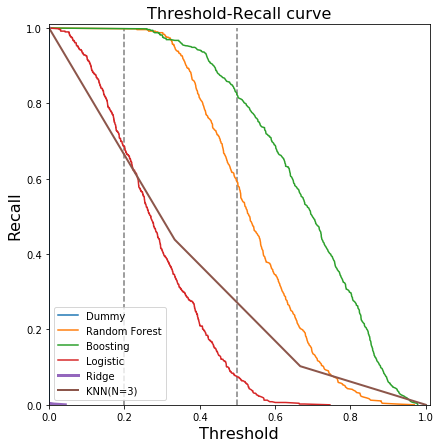

In [214]:
plt.figure(figsize=(7,7))
plt.xlim([-0.0, 1.01])
plt.ylim([-0.0, 1.01])

dummy_clf_df = dummy_clf.predict_proba(X_train_selected)[:,1]
precision_dummy_clf, recall_dummy_clf, thresholds = precision_recall_curve(y_train, dummy_clf_df)
plt.plot(np.hstack((0,thresholds)),recall_dummy_clf, label='Dummy')

clf_df = clf.predict_proba(X_train_selected)[:,1]
precision_clf, recall_clf, thresholds = precision_recall_curve(y_train, clf_df)
plt.plot(np.hstack((0,thresholds)), recall_clf, label='Random Forest')

gbdt_df = gbdt.predict_proba(X_train_selected)[:,1]
precision_gbdt, recall_gbdt, thresholds = precision_recall_curve(y_train, gbdt_df)
plt.plot(np.hstack((0,thresholds)), recall_gbdt, label='Boosting')
#plt.plot(precision_score(y_train,gbdt.predict(X_train_selected)), recall_score(y_train,gbdt.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

# lsvc_df = lsvc.predict_proba(X_train_selected)[:,1]
# precision_lsvc, recall_lsvc, thresholds = precision_recall_curve(y_train, lsvc_df)
# plt.plot(np.hstack((0,thresholds)), recall_lsvc, label='SVM')
# #plt.plot(precision_score(y_train,lsvc.predict(X_train_selected)), recall_score(y_train,lsvc.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

lg_df = lg.predict_proba(X_train_selected)[:,1]
precision_lg, recall_lg, thresholds = precision_recall_curve(y_train, lg_df)
plt.plot(np.hstack((0,thresholds)), recall_lg, label='Logistic')
#plt.plot(precision_score(y_train,lr.predict(X_train_selected)), recall_score(y_train,lr.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

#ridge_df = np.exp(ridge.decision_function(X_train_selected)) / np.sum(np.exp(ridge.decision_function(X_train_selected)))
ridge_df = ridge.decision_function(X_train_selected)
precision_ridge, recall_ridge, thresholds = precision_recall_curve(y_train, ridge_df)
plt.plot(np.hstack((0,thresholds)), recall_ridge, label='Ridge',linewidth=3)
#plt.plot(precision_score(y_train,ridge.predict(X_train_selected)), recall_score(y_train,ridge.predict(X_train_selected)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

knn_df = knn.predict_proba(X_train_selected)[:,1]
precision_knn, recall_knn, thresholds = precision_recall_curve(y_train, knn_df)
plt.plot(np.hstack((0,thresholds)), recall_knn, label='KNN(N=3)',linewidth=2)

plt.vlines(0.2,ymin=0,ymax=1,linestyle='dashed',colors='grey')
plt.vlines(0.5,ymin=0,ymax=1,linestyle='dashed',colors='grey')

plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Threshold-Recall curve', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show()

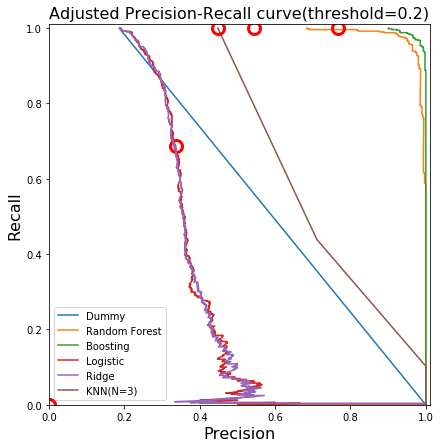

In [211]:
plt.figure(figsize=(7,7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

dummy_clf_df = dummy_clf.predict_proba(X_train_selected)[:,1]
precision_dummy_clf, recall_dummy_clf, thresholds = precision_recall_curve(y_train, dummy_clf_df)
plt.plot(precision_dummy_clf, recall_dummy_clf, label='Dummy')
plt.plot(precision_score(y_train,1*(dummy_clf_df>=0.2)), recall_score(y_train,1*(dummy_clf_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

clf_df = clf.predict_proba(X_train_selected)[:,1]
precision_clf, recall_clf, thresholds = precision_recall_curve(y_train, clf_df)
plt.plot(precision_clf, recall_clf, label='Random Forest')
plt.plot(precision_score(y_train,1*(clf_df>=0.2)), recall_score(y_train,1*(clf_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

gbdt_df = gbdt.predict_proba(X_train_selected)[:,1]
precision_gbdt, recall_gbdt, thresholds = precision_recall_curve(y_train, gbdt_df)
plt.plot(precision_gbdt, recall_gbdt, label='Boosting')
plt.plot(precision_score(y_train,1*(gbdt_df>=0.2)), recall_score(y_train,1*(gbdt_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

# lsvc_df = lsvc.predict_proba(X_train_selected)[:,1]
# precision_lsvc, recall_lsvc, thresholds = precision_recall_curve(y_train, lsvc_df)
# plt.plot(precision_lsvc, recall_lsvc, label='SVM')
# plt.plot(precision_score(y_train,1*(lsvc_df>=0.2)), recall_score(y_train,1*(lsvc_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

lg_df = lg.predict_proba(X_train_selected)[:,1]
precision_lg, recall_lg, thresholds = precision_recall_curve(y_train, lg_df)
plt.plot(precision_lg, recall_lg, label='Logistic')
plt.plot(precision_score(y_train,1*(lg_df>=0.2)), recall_score(y_train,1*(lg_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

ridge_df = np.exp(ridge.decision_function(X_train_selected)) / np.sum(np.exp(ridge.decision_function(X_train_selected)))
precision_ridge, recall_ridge, thresholds = precision_recall_curve(y_train, ridge_df)
plt.plot(precision_ridge, recall_ridge, label='Ridge')
plt.plot(precision_score(y_train,1*(ridge_df>=0.2)), recall_score(y_train,1*(ridge_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

knn_df = knn.predict_proba(X_train_selected)[:,1]
precision_knn, recall_knn, thresholds = precision_recall_curve(y_train, knn_df)
plt.plot(precision_knn, recall_knn, label='KNN(N=3)')
plt.plot(precision_score(y_train,1*(knn_df>=0.2)), recall_score(y_train,1*(knn_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Adjusted Precision-Recall curve(threshold=0.2)', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show()

### ROC

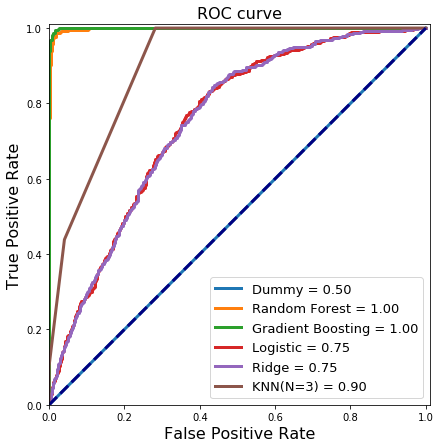

In [213]:
plt.figure(figsize=(7,7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

fpr, tpr, _ = roc_curve(y_train, dummy_clf_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Dummy = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_train, clf_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Random Forest = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_train, gbdt_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Gradient Boosting = {:0.2f}'.format(roc_auc))

# fpr, tpr, _ = roc_curve(y_train, lsvc_df)  
# roc_auc = auc(fpr, tpr) 
# plt.plot(fpr, tpr, lw=3, label='SVM = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_train, lg_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Logistic = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_train, ridge_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Ridge = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_train, knn_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='KNN(N=3) = {:0.2f}'.format(roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### F1 score, beta=2

In [215]:
f1_train=[fbeta_score(y_train,dummy_clf.predict(X_train_selected),beta=2,average='macro'),
          fbeta_score(y_train,clf.predict(X_train_selected),beta=2,average='macro'),
          fbeta_score(y_train,gbdt.predict(X_train_selected),beta=2,average='macro'),
          #fbeta_score(y_train,lsvc.predict(X_train_selected),beta=2,average='macro'),
          fbeta_score(y_train,lg.predict(X_train_selected),beta=2,average='macro'),
          fbeta_score(y_train,ridge.predict(X_train_selected),beta=2,average='macro'),
          fbeta_score(y_train,knn.predict(X_train_selected),beta=2,average='macro')]
f1_train_adjust=[
          fbeta_score(y_train,1*(dummy_clf_df)>=0.2,beta=2,average='macro'),
          fbeta_score(y_train,1*(clf_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_train,1*(gbdt_df>=0.2),beta=2,average='macro'),
          #fbeta_score(y_train,1*(lsvc_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_train,1*(lg_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_train,1*(ridge_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_train,1*(knn_df>=0.2),beta=2,average='macro')]
acc_train=[accuracy_score(y_train,dummy_clf.predict(X_train_selected)),
          accuracy_score(y_train,clf.predict(X_train_selected)),
          accuracy_score(y_train,gbdt.predict(X_train_selected)),
          #accuracy_score(y_train,lsvc.predict(X_train_selected)),
          accuracy_score(y_train,lg.predict(X_train_selected)),
          accuracy_score(y_train,ridge.predict(X_train_selected)),
          accuracy_score(y_train,knn.predict(X_train_selected))]
acc_train_adjust=[accuracy_score(y_train,1*(dummy_clf_df)>=0.2),
          accuracy_score(y_train,1*(clf_df)>=0.2),
          accuracy_score(y_train,1*(gbdt_df>=0.2)),
          #accuracy_score(y_train,lsvc.predict(X_train_selected)),
          accuracy_score(y_train,1*(lg_df>=0.2)),
          accuracy_score(y_train,1*(ridge_df>=0.2)),
          accuracy_score(y_train,1*(knn_df>=0.2))]

## Prediction

### Precision-Recall Adjusted

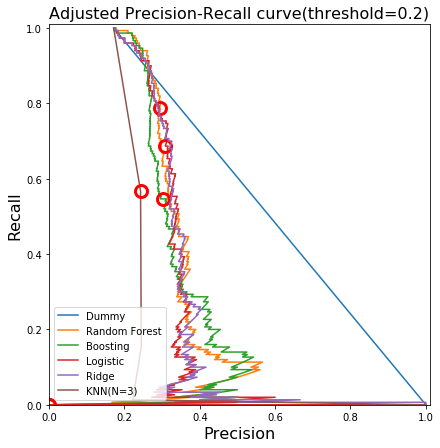

In [225]:
plt.figure(figsize=(7,7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

dummy_clf_df = dummy_clf.predict_proba(X_test_selected)[:,1]
precision_dummy_clf, recall_dummy_clf, thresholds = precision_recall_curve(y_test, dummy_clf_df)
plt.plot(precision_dummy_clf, recall_dummy_clf, label='Dummy')
plt.plot(precision_score(y_test,1*(dummy_clf_df>=0.2)), recall_score(y_test,1*(dummy_clf_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

clf_df = clf.predict_proba(X_test_selected)[:,1]
precision_clf, recall_clf, thresholds = precision_recall_curve(y_test, clf_df)
plt.plot(precision_clf, recall_clf, label='Random Forest')
plt.plot(precision_score(y_test,1*(clf_df>=0.2)), recall_score(y_test,1*(clf_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

gbdt_df = gbdt.predict_proba(X_test_selected)[:,1]
precision_gbdt, recall_gbdt, thresholds = precision_recall_curve(y_test, gbdt_df)
plt.plot(precision_gbdt, recall_gbdt, label='Boosting')
plt.plot(precision_score(y_test,1*(gbdt_df>=0.2)), recall_score(y_test,1*(gbdt_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

# lsvc_df = lsvc.predict_proba(X_test_selected)[:,1]
# precision_lsvc, recall_lsvc, thresholds = precision_recall_curve(y_test, lsvc_df)
# plt.plot(precision_lsvc, recall_lsvc, label='SVM')
# plt.plot(precision_score(y_test,1*(lsvc_df>=0.2)), recall_score(y_test,1*(lsvc_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

lg_df = lg.predict_proba(X_test_selected)[:,1]
precision_lg, recall_lg, thresholds = precision_recall_curve(y_test, lg_df)
plt.plot(precision_lg, recall_lg, label='Logistic')
plt.plot(precision_score(y_test,1*(lg_df>=0.2)), recall_score(y_test,1*(lg_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

ridge_df = np.exp(ridge.decision_function(X_test_selected)) / np.sum(np.exp(ridge.decision_function(X_test_selected)))
precision_ridge, recall_ridge, thresholds = precision_recall_curve(y_test, ridge_df)
plt.plot(precision_ridge, recall_ridge, label='Ridge')
plt.plot(precision_score(y_test,1*(ridge_df>=0.2)), recall_score(y_test,1*(ridge_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

knn_df = knn.predict_proba(X_test_selected)[:,1]
precision_knn, recall_knn, thresholds = precision_recall_curve(y_test, knn_df)
plt.plot(precision_knn, recall_knn, label='KNN(N=3)')
plt.plot(precision_score(y_test,1*(knn_df>=0.2)), recall_score(y_test,1*(knn_df>=0.2)), 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)

plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.title('Adjusted Precision-Recall curve(threshold=0.2)', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.axes().set_aspect('equal')
plt.show()

### ROC

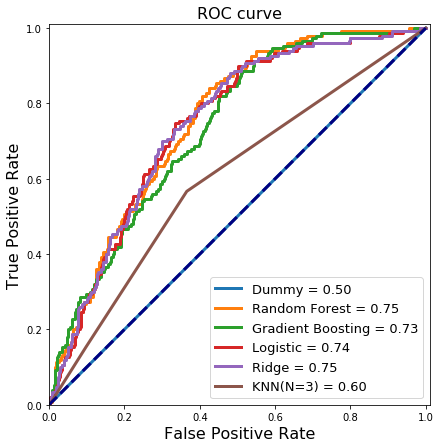

In [226]:
plt.figure(figsize=(7,7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

fpr, tpr, _ = roc_curve(y_test, dummy_clf_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Dummy = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test, clf_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Random Forest = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test, gbdt_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Gradient Boosting = {:0.2f}'.format(roc_auc))

# fpr, tpr, _ = roc_curve(y_test, lsvc_df)  
# roc_auc = auc(fpr, tpr) 
# plt.plot(fpr, tpr, lw=3, label='SVM = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test, lg_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Logistic = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test, ridge_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='Ridge = {:0.2f}'.format(roc_auc))

fpr, tpr, _ = roc_curve(y_test, knn_df)  
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=3, label='KNN(N=3) = {:0.2f}'.format(roc_auc))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### F1 score, beta=2

In [228]:
f1_test=[ fbeta_score(y_test,dummy_clf.predict(X_test_selected),beta=2,average='macro'),
          fbeta_score(y_test,clf.predict(X_test_selected),beta=2,average='macro'),
          fbeta_score(y_test,gbdt.predict(X_test_selected),beta=2,average='macro'),
          #fbeta_score(y_test,lsvc.predict(X_test_selected),beta=2,average='macro'),
          fbeta_score(y_test,lg.predict(X_test_selected),beta=2,average='macro'),
          fbeta_score(y_test,ridge.predict(X_test_selected),beta=2,average='macro'),
          fbeta_score(y_test,knn.predict(X_test_selected),beta=2,average='macro')]
f1_test_adjust=[fbeta_score(y_test,1*(dummy_clf_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_test,1*(clf_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_test,1*(gbdt_df>=0.2),beta=2,average='macro'),
          #fbeta_score(y_test,1*(lsvc_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_test,1*(lg_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_test,1*(ridge_df>=0.2),beta=2,average='macro'),
          fbeta_score(y_test,1*(knn_df>=0.2),beta=2,average='macro')]
acc_test=[accuracy_score(y_test,dummy_clf.predict(X_test_selected)),
          accuracy_score(y_test,clf.predict(X_test_selected)),
          accuracy_score(y_test,gbdt.predict(X_test_selected)),
          #accuracy_score(y_train,lsvc.predict(X_train_selected)),
          accuracy_score(y_test,lg.predict(X_test_selected)),
          accuracy_score(y_test,ridge.predict(X_test_selected)),
          accuracy_score(y_test,knn.predict(X_test_selected))]
acc_test_adjust=[accuracy_score(y_test,1*(dummy_clf_df)>=0.2),
          accuracy_score(y_test,1*(clf_df)>=0.2),
          accuracy_score(y_test,1*(gbdt_df>=0.2)),
          #accuracy_score(y_train,lsvc.predict(X_train_selected)),
          accuracy_score(y_test,1*(lg_df>=0.2)),
          accuracy_score(y_test,1*(ridge_df>=0.2)),
          accuracy_score(y_test,1*(knn_df>=0.2))]

In [245]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Classifiers</b>','<b>Fbeta score (training, th.=0.5)</b>','<b>Fbeta score (training, th.=0.2)</b>','<b>Fbeta score (test, th.=0.5)</b>','<b>Fbeta score (test, th.=0.2)</b>','<b>Accuracy (training)</b>','<b>Accuracy (test)</b>'],
    #line_color='lightgrey',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Dummy','Random Forest', 'Gradient Boosting', 'Logistic', 'Ridge','KNN(N=3)'],
      np.round(f1_train,3),
      np.round(f1_train_adjust,3),
      np.round(f1_test,3),
      np.round(f1_test_adjust,3),
      np.round(acc_train,3),
      np.round(acc_test,3)],
    #line_color='lightgrey',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor,rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

In [246]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>BLOOD PRESSURE CATEGORY</b>','<b>SYSTOLIC/mm Hg</b>','<b></b>','<b>DIASTOLIC/mm Hg</b>'],
    #line_color='lightgrey',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['NORMAL','ELEVATED', 'STAGE 1 HYPERTENSION', 'STAGE 2 HYPERTENSION', 'HYPERTENSIVE CRISIS'],
      ['LESS THAN 120','120-129','130-139','140 OR HIGHER','HIGHER THAN 180'],
        ['and','and','or','or','and/or'],
        ['LESS THAN 80','LESS THAN 80','80-89','90 OR HIGHER','HIGHER THAN 120']
    ],
    #line_color='lightgrey',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor,rowEvenColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()